In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Opening the CSV file
df = pd.read_csv('weatherreadings1.csv')

# Visualizing the first line of data
df.head()


,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [12]:
# Converting the reportStartDateTime column to datetime format
df['reportStartDateTime'] = pd.to_datetime(df['reportStartDateTime'])

# Check the conversion
df['reportStartDateTime'].head()


0   2024-10-02 16:15:00+00:00
1   2024-10-02 16:45:00+00:00
2   2024-10-02 17:00:00+00:00
3   2024-10-02 17:15:00+00:00
4   2024-10-02 17:30:00+00:00
Name: reportStartDateTime, dtype: datetime64[ns, UTC]

In [13]:
# Extract the date from 'reportStartDateTime'
df['date'] = df['reportStartDateTime'].dt.date

# Count the number of reports per date
report_counts = df['date'].value_counts().sort_index()

# Create a DataFrame with the date and frequency
report_data = pd.DataFrame({
    'date': report_counts.index,
    'frequency': report_counts.values
})

# Sort the data by date
report_data = report_data.sort_values('date')

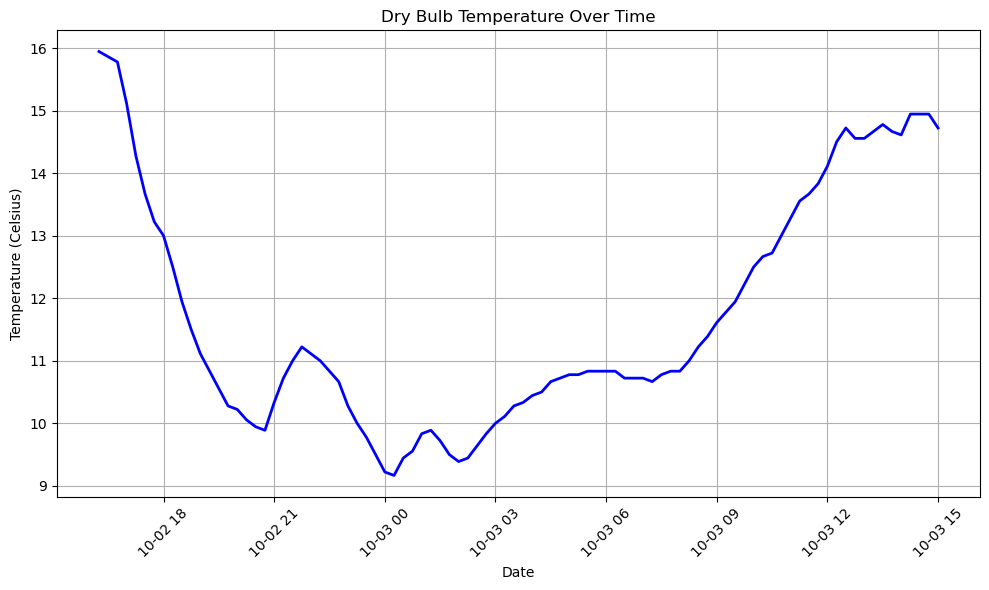

In [15]:
# Time Series Plot (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(df['reportStartDateTime'], df['dryBulbTemperature_Celsius'], color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Dry Bulb Temperature Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


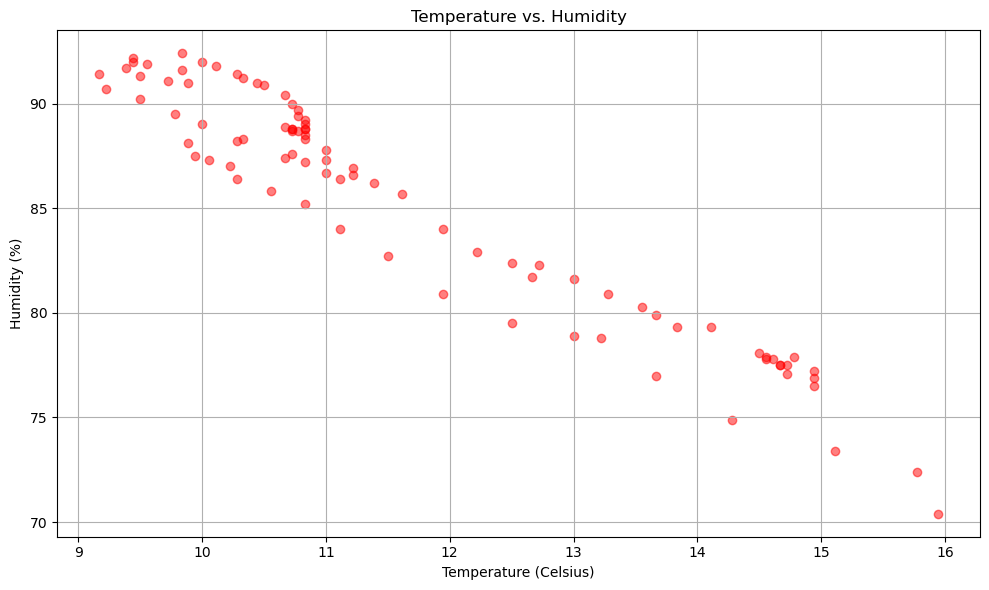

In [16]:
# Scatter Plot (Temperature vs. Humidity)
plt.figure(figsize=(10, 6))
plt.scatter(df['dryBulbTemperature_Celsius'], df['relativeHumidity'], color='red', alpha=0.5)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity')
plt.grid(True)
plt.tight_layout()
plt.show()


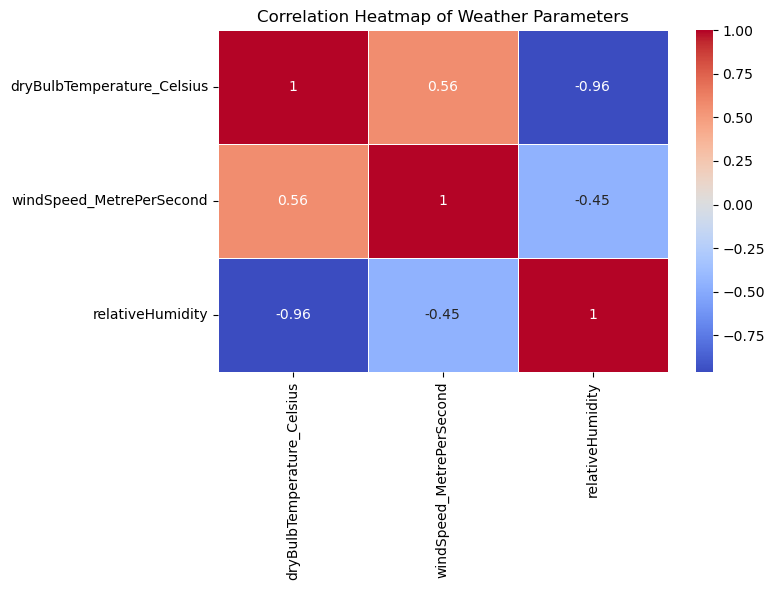

In [19]:
# Correlation Heatmap
corr = df[['dryBulbTemperature_Celsius', 'windSpeed_MetrePerSecond', 'relativeHumidity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Parameters')
plt.tight_layout()
plt.show()

# The correlation coefficient ranges from -1 to +1:
# +1: Perfect positive correlation (both variables increase together).
#0: No correlation (changes in one variable do not affect the other).
#-1: Perfect negative correlation (one variable increases while the other decreases).